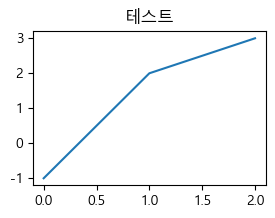

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

pd.Series([-1,2,3]).plot(title='테스트', figsize=(3,2))
pass


### 데이터프레임 생성

In [2]:
# --------------------
# 기상데이터 전체 데이터프레임
#   df_all
# --------------------

df_all = pd.read_csv("C:\\Users\\User\\Documents\\VSCode\\Data School\\data school\\00.data\\기상데이터\\기상데이터_전체.csv")
df_all.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),1시간 최다강수량(mm),일강수량(mm),연도,월
0,108,서울,1907-10-01,13.5,7.9,20.7,NaN,NaN,1907,10
1,108,서울,1907-10-02,16.2,7.9,22.0,NaN,0.2,1907,10
2,108,서울,1907-10-03,16.2,13.1,21.3,NaN,2.4,1907,10
3,108,서울,1907-10-04,16.5,11.2,22.0,NaN,NaN,1907,10
4,108,서울,1907-10-05,17.6,10.9,25.4,NaN,NaN,1907,10


In [4]:
# --------------------
# 지점정보 데이터프레임
#   df_location
# --------------------

df_location = pd.read_csv("C:\\Users\\User\\Documents\\VSCode\\Data School\\data school\\00.data\\기상데이터\\기상데이터_지점정보.csv")
df_location.head()

,지점,지점명,데이터수,시작년도,끝년도
0,90,속초,20910,1968,2025
1,93,북춘천,3104,2016,2025
2,95,철원,13605,1988,2025
3,98,동두천,9952,1998,2025
4,99,파주,8490,2002,2025


### 데이터 선택
* 행 : 지점을 입력받아 해당 지점의 데이터만 선택한다.
* 열 : 기온분석을 위한 컬럼만 선택한다.

In [5]:
# --------------------
# 지점 입력받기
#   location_name
# --------------------

location_name = input("지점명을 입력하세요: ")

# --------------------
# 입력받은 지점의 정보 확인
# --------------------

df_location[df_location['지점명'] == location_name]

,지점,지점명,데이터수,시작년도,끝년도
11,108,서울,41936,1907,2025


In [6]:
# -----------------------------------------
# 전체 데이터에서 입력받은 지점의 데이터만 선택
# 선택할 컬럼 : ['지점','지점명','연도','일시', '평균기온(°C)','최저기온(°C)','최고기온(°C)']
#   df_target
# -----------------------------------------

df_target = df_all[df_all['지점명'] == location_name][
    ['지점', '지점명', '연도', '일시', '평균기온(°C)', '최저기온(°C)', '최고기온(°C)']
]
df_target.head()

,지점,지점명,연도,일시,평균기온(°C),최저기온(°C),최고기온(°C)
0,108,서울,1907,1907-10-01,13.5,7.9,20.7
1,108,서울,1907,1907-10-02,16.2,7.9,22.0
2,108,서울,1907,1907-10-03,16.2,13.1,21.3
3,108,서울,1907,1907-10-04,16.5,11.2,22.0
4,108,서울,1907,1907-10-05,17.6,10.9,25.4


In [7]:
# -----------------------------------------
# 연도별 데이터 개수 확인
#   year_count
# -----------------------------------------

year_count = df_target['연도'].value_counts().sort_index()
year_count

연도
1907     92
1908    366
1909    365
1910    365
1911    365
       ... 
2021    365
2022    365
2023    365
2024    366
2025     90
Name: count, Length: 119, dtype: int64

In [8]:
# -----------------------------------------
# 데이터가 350개 이상인 연도 목록
#   year_select
# -----------------------------------------

year_select = year_count[year_count >= 350].index

In [9]:
# -----------------------------------------
# 데이터의 갯수가 350개 이상인 연도에 해당되는 데이터만 선택
#   df_target
# -----------------------------------------

df_target = df_target[df_target['연도'].isin(year_select)]
df_target

,지점,지점명,연도,일시,평균기온(°C),최저기온(°C),최고기온(°C)
92,108,서울,1908,1908-01-01,-5.9,-9.1,-1.3
93,108,서울,1908,1908-01-02,-7.7,-13.9,-3.0
94,108,서울,1908,1908-01-03,-6.2,-10.8,-2.9
95,108,서울,1908,1908-01-04,-7.5,-12.8,-1.7
96,108,서울,1908,1908-01-05,-4.8,-11.3,-0.1
...,...,...,...,...,...,...,...
1595876,108,서울,2024,2024-12-27,-2.6,-5.9,1.8
1595877,108,서울,2024,2024-12-28,-3.0,-6.7,1.1
1595878,108,서울,2024,2024-12-29,1.1,-4.2,6.1
1595879,108,서울,2024,2024-12-30,5.5,1.9,10.1


In [10]:
# -----------------------------------------
# 연도별 데이터 개수 다시 확인
# -----------------------------------------

year_count = df_target['연도'].value_counts().sort_index()
year_count

연도
1908    366
1909    365
1910    365
1911    365
1912    366
       ... 
2020    366
2021    365
2022    365
2023    365
2024    366
Name: count, Length: 113, dtype: int64

### 결측치 분석 및 처리

In [11]:
# -----------------------------------------
# 결측치 확인
# -----------------------------------------

df_target.isnull().sum()

지점          0
지점명         0
연도          0
일시          0
평균기온(°C)    0
최저기온(°C)    3
최고기온(°C)    3
dtype: int64

In [12]:
# -----------------------------------------
# 결측치 확인
# -----------------------------------------

df_target[df_target.isnull().any(axis=1)]

,지점,지점명,연도,일시,평균기온(°C),최저기온(°C),최고기온(°C)
185194,108,서울,1967,1967-02-19,-1.7,NaN,NaN
254931,108,서울,1973,1973-10-16,12.3,NaN,NaN
1273508,108,서울,2017,2017-10-12,11.4,8.8,NaN
1595004,108,서울,2022,2022-08-08,26.8,NaN,28.4


In [13]:
# -----------------------------------------
# 결측치를 이전 데이터로 채우기
# -----------------------------------------

df_target.fillna(method='ffill', inplace=True)

# -----------------------------------------
# 결측치를 다음 데이터로 채우기
# -----------------------------------------

df_target.fillna(method='bfill', inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_8104\2989073869.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_target.fillna(method='ffill', inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_8104\2989073869.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_target.fillna(method='bfill', inplace=True)


In [14]:
# -----------------------------------------
# 결측치 다시 확인
# -----------------------------------------

df_target.isnull().sum()

지점          0
지점명         0
연도          0
일시          0
평균기온(°C)    0
최저기온(°C)    0
최고기온(°C)    0
dtype: int64

### 연도별 연 평균기온 분석

In [16]:
# ----------------------------
# 연도별 연 평균기온 요약
# ----------------------------

df_yearly_mean = df_target.groupby('연도')[['평균기온(°C)', '최저기온(°C)', '최고기온(°C)']].mean()
df_yearly_mean

,평균기온(°C),최저기온(°C),최고기온(°C)
연도,,,
1908,10.427322,5.799727,15.771858
1909,10.608767,5.832603,16.011507
1910,10.412055,5.752603,16.008767
1911,10.654795,6.035616,16.001644
1912,10.123770,5.086885,15.646995
...,...,...,...
2020,13.271858,9.389617,17.867213
2021,13.752055,9.622466,18.491781
2022,13.296164,9.256438,18.077808


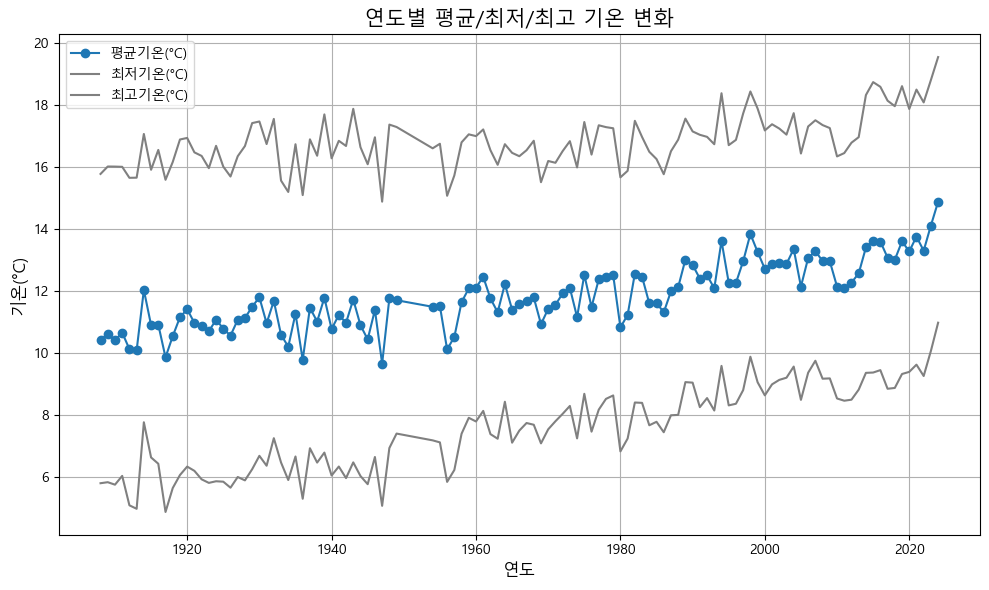

In [21]:
# ----------------------------
# 연도별 연 평균기온 시각화
# ---------------------------- 

plt.figure(figsize=(10, 6))

plt.plot(df_yearly_mean.index, df_yearly_mean['평균기온(°C)'], label='평균기온(°C)', marker='o')
plt.plot(df_yearly_mean.index, df_yearly_mean['최저기온(°C)'], label='최저기온(°C)', color='gray')
plt.plot(df_yearly_mean.index, df_yearly_mean['최고기온(°C)'], label='최고기온(°C)', color='gray')

plt.title('연도별 평균/최저/최고 기온 변화', fontsize=15)
plt.xlabel('연도', fontsize=12)
plt.ylabel('기온(°C)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 연도별 기온 변화

### 1. **평균기온은 꾸준히 상승 중**
- 1910년대 평균기온은 대략 **10~12도** 수준이었지만,
- 최근 2020년대에 들어서는 **14도 이상**까지 상승.
- **전반적인 온난화 경향**이 뚜렷하게 나타남.

### 2. **최고기온보다 최저기온 상승이 더 가팔라**
- 최고기온(회색 선)은 전체적으로 완만하게 상승하지만, **최저기온(회색 선)**은 **특히 최근 30년간 빠르게 상승**하는 경향이 보임.
-  **밤 기온이 떨어지지 않는 열대야의 빈도 증가**와 연결될 수 있음.

### 3. **변동성은 과거보다 최근이 더 크다**
- 특히 1970~1990년까지는 상대적으로 **평평한 구간**, 큰 변화 없음.
- 1990년대 이후부터는 연도별 변화폭이 더 커짐 → 극단적인 더위/추위의 **기후 불안정성 증가** 가능성.

### 4. **2023~2024년은 세 지표 모두에서 최고치 수준**
- 그래프 끝부분에서 **평균, 최저, 최고 모두 급상승**.
- 최근 몇 년이 **역대 가장 더운 해들**이었다는 사실과도 일치함.